In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from alp import exp
from alp import plot_tools as pt
from alp import models
from alp.exp_dicts import EXPERIMENTS

In [3]:
def get_ntaus_per_POT(files, pid_mother=None):
    """
    Get the number of taus per POT
    """
    
    df = exp.load_events(files, as_dataframe=True)
    
    total_weight_unmasked = df.weights.sum()

    if pid_mother is not None:
        mask = df.mother_pid == pid_mother
    else:
        mask = np.ones(len(df), dtype=bool)
   
    # Ratio of weighted events to total generated events
    ratio = df.attrs['tau_xsec_mb'] / df.attrs['total_xsec_mb'] * df.weights[mask].sum() / total_weight_unmasked
    
    # Statistical uncertainty on the sum of weights
    relative_uncertainty = np.sqrt((df.weights[mask]**2).sum())/df.weights[mask].sum()
    
    # Propagate uncertainty to the ratio (assuming total_events is exact)
    uncertainty = relative_uncertainty * ratio
    
    xsec = df.attrs['tau_xsec_mb'] * df.weights[mask].sum()/total_weight_unmasked
    
    return ratio, uncertainty, xsec

def get_taus(files):
    df = exp.load_events(files, as_dataframe=True)
    return df

In [4]:
def summarize_taus(name):
    print(f"\nTau summary for {name}")
    files = name
    ratio, unc, xsec = get_ntaus_per_POT(files, pid_mother=411)
    print(f"Taus/event (D+): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(files, pid_mother=-411)
    print(f"Taus/event (D-): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(files, pid_mother=431)
    print(f"Taus/event (Ds+): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(files, pid_mother=-431)
    print(f"Taus/event (Ds-): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(files, pid_mother=100443)
    print(f"Taus/event (psi(2S)): {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")
    ratio, unc, xsec = get_ntaus_per_POT(files,)
    print(f"Taus/event: {ratio:.2e} +/- {unc:.2e} --> (xsec/mb = {xsec:.2e} +/- {unc/ratio * xsec:.2e})")

In [5]:
NUMI_files = ['pythia8_events/soft_NuMI_120GeV_pt1TeV','pythia8_events/soft_NuMI_120GeV_pt1TeV_v2','pythia8_events/soft_NuMI_120GeV_pt1TeV_v3','pythia8_events/soft_SPS_120GeV_pt1TeV']
SPS_files  = ['pythia8_events/soft_SPS_400GeV_pt1TeV','pythia8_events/soft_SPS_400GeV_pt1TeV_v2','pythia8_events/soft_SPS_400GeV_pt1TeV_v3']
LHC_files  = ['pythia8_events/soft_test_LHC13.6TeV_pt1TeV_weighted']

summarize_taus(LHC_files)
summarize_taus(SPS_files)
summarize_taus(NUMI_files)


Tau summary for ['pythia8_events/soft_test_LHC13.6TeV_pt1TeV_weighted']
Taus/event (D+): 7.79e-04 +/- 4.58e-06 --> (xsec/mb = 7.97e-02 +/- 4.68e-04)
Taus/event (D-): 7.85e-04 +/- 4.59e-06 --> (xsec/mb = 8.03e-02 +/- 4.70e-04)
Taus/event (Ds+): 2.81e-04 +/- 2.75e-06 --> (xsec/mb = 2.87e-02 +/- 2.81e-04)
Taus/event (Ds-): 2.75e-04 +/- 2.72e-06 --> (xsec/mb = 2.82e-02 +/- 2.78e-04)
Taus/event (psi(2S)): 1.22e-05 +/- 5.75e-07 --> (xsec/mb = 1.25e-03 +/- 5.88e-05)
Taus/event: 2.14e-03 +/- 7.59e-06 --> (xsec/mb = 2.19e-01 +/- 7.76e-04)

Tau summary for ['pythia8_events/soft_SPS_400GeV_pt1TeV', 'pythia8_events/soft_SPS_400GeV_pt1TeV_v2', 'pythia8_events/soft_SPS_400GeV_pt1TeV_v3']
Taus/event (D+): 5.96e-07 +/- 5.12e-09 --> (xsec/mb = 2.37e-05 +/- 2.04e-07)
Taus/event (D-): 7.45e-07 +/- 5.73e-09 --> (xsec/mb = 2.97e-05 +/- 2.28e-07)
Taus/event (Ds+): 1.69e-07 +/- 2.73e-09 --> (xsec/mb = 6.72e-06 +/- 1.09e-07)
Taus/event (Ds-): 2.02e-07 +/- 2.99e-09 --> (xsec/mb = 8.06e-06 +/- 1.19e-07)
Taus/e

In [6]:
df_w = exp.load_events(['pythia8_events/soft_NuMI_120GeV_pt1TeV','pythia8_events/soft_SPS_120GeV_pt1TeV'], as_dataframe=True)

Text(0, 0.5, 'Events/POT')

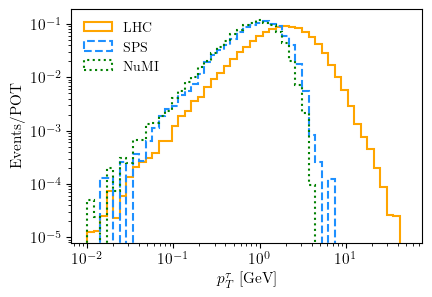

In [7]:
fig, ax = pt.std_fig()

b = np.geomspace(1e-2, 50, 50)

df_w = exp.load_events('pythia8_events/soft_test_LHC13.6TeV_pt1TeV_weighted', as_dataframe=True)
pT = np.sqrt(df_w.px**2 + df_w.py**2)
w = df_w.weights
ax.hist(pT, weights=w/w.sum(), bins=b, histtype='step', alpha=1, label='LHC', color='orange', lw=1.5, ls='-')


df_w = exp.load_events('pythia8_events/soft_SPS_400GeV_pt1TeV', as_dataframe=True)
pT = np.sqrt(df_w.px**2 + df_w.py**2)
w = df_w.weights
ax.hist(pT, weights=w/w.sum(), bins=b, histtype='step', alpha=1, label='SPS', color='dodgerblue', lw=1.5, ls='--')

df_w = exp.load_events('pythia8_events/soft_NuMI_120GeV_pt1TeV', as_dataframe=True)
pT = np.sqrt(df_w.px**2 + df_w.py**2)
w = df_w.weights
ax.hist(pT, weights=w/w.sum(), bins=b, histtype='step', alpha=1, label='NuMI', color='green', lw=1.5, ls=':')


ax.legend()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$p_T^{\tau}$ [GeV]')
ax.set_ylabel('Events/POT')
# ax.set_ylim(1e-15, 1e-7)

# fig.savefig('plots/taus_pt.pdf', bbox_inches='tight')